In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
#Helper Fuction
def import_from_gdrive(id_file, file_name):
  link = 'https://drive.google.com/uc?id=' + id_file
  output_file = '/content/' + file_name
  gdown.download(link, output_file, quiet=False)
  df = pd.read_csv(file_name)
  return df

In [ ]:
link_train_combined = '1UiA0Oq_qRL889TjW1qBZdNTKghv1oqY9'
link_test_combined = '1XvL9NOP4TR7H_x_7TmNXOpYnpjkPiZS0'
train = import_from_gdrive(link_train_combined,'train.csv')
test = import_from_gdrive(link_test_combined,'test.csv')

Downloading...
From: https://drive.google.com/uc?id=1UiA0Oq_qRL889TjW1qBZdNTKghv1oqY9
To: /content/train.csv
100%|██████████| 65.8M/65.8M [00:00<00:00, 233MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XvL9NOP4TR7H_x_7TmNXOpYnpjkPiZS0
To: /content/test.csv
100%|██████████| 20.9M/20.9M [00:00<00:00, 140MB/s] 


In [ ]:
test.head()

,id,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,kelompok,titik1,titik2,maxspeed_mph,lat1,long1,lat2,long2,jarak_km
0,0,2020-02-23 00:00:00+00:00,4004732,32046542,6454026544,32046542_6454026544,32046542,6454026544,30,51.465182,-0.255240,51.465204,-0.254595,0.044870
1,1,2020-02-23 00:00:00+00:00,182210371,1314925464,1314925496,1314925464_1314925496,1314925464,1314925496,30,51.458973,-0.141882,51.459254,-0.141646,0.035285
2,2,2020-02-23 00:00:00+00:00,22932408,1482086782,26481020,1482086782_26481020,1482086782,26481020,20,51.449437,-0.160688,51.449295,-0.161060,0.030340
3,3,2020-02-23 00:00:00+00:00,182210371,3892883,267337489,267337489_3892883,267337489,3892883,30,51.457466,-0.143110,51.457325,-0.143228,0.017702
4,4,2020-02-23 00:00:00+00:00,66924592,266041030,2592978110,2592978110_266041030,2592978110,266041030,30,51.466309,-0.113371,51.467314,-0.112842,0.117762


In [ ]:
train.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,kelompok,titik1,titik2,maxspeed_mph,lat1,long1,lat2,long2,jarak_km
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126,1425033102_21390008,1425033102,21390008,30,51.434975,-0.16109,51.434928,-0.161176,0.007931
1,2020-02-01 01:00:00+00:00,691007296,1425033102,21390008,28.999,1425033102_21390008,1425033102,21390008,30,51.434975,-0.16109,51.434928,-0.161176,0.007931
2,2020-02-01 02:00:00+00:00,691007296,21390008,1425033102,34.772,1425033102_21390008,1425033102,21390008,30,51.434975,-0.16109,51.434928,-0.161176,0.007931
3,2020-02-01 02:00:00+00:00,691007296,1425033102,21390008,32.222,1425033102_21390008,1425033102,21390008,30,51.434975,-0.16109,51.434928,-0.161176,0.007931
4,2020-02-01 03:00:00+00:00,691007296,1425033102,21390008,37.338,1425033102_21390008,1425033102,21390008,30,51.434975,-0.16109,51.434928,-0.161176,0.007931


In [ ]:
test.shape

(127489, 14)

In [ ]:
train.shape

(398648, 14)

In [ ]:
# train = train.drop(columns=['id_titik_mulai','id_titik_akhir','titik1','titik2'])
# test = test.drop(columns=['id_titik_mulai','id_titik_akhir','titik1','titik2'])

# train = train.drop(columns=['lat1','long1','lat2','long2'])
# test = test.drop(columns=['lat1','long1','lat2','long2')

#Data Understanding

In [ ]:
train['waktu_setempat'] = pd.to_datetime(train['waktu_setempat'])
train['tanggal'] = train['waktu_setempat'].dt.day
train['jam'] = train['waktu_setempat'].dt.strftime('%H:%M:%S')
train['jam'] = train['waktu_setempat'].dt.hour + train['waktu_setempat'].dt.minute / 60
# train.drop(columns=['waktu_setempat'], inplace=True)

test['waktu_setempat'] = pd.to_datetime(test['waktu_setempat'])
test['tanggal'] = test['waktu_setempat'].dt.day
test['jam'] = test['waktu_setempat'].dt.strftime('%H:%M:%S')
test['jam'] = test['waktu_setempat'].dt.hour + test['waktu_setempat'].dt.minute / 60
# test.drop(columns=['waktu_setempat'], inplace=True)

#EDA

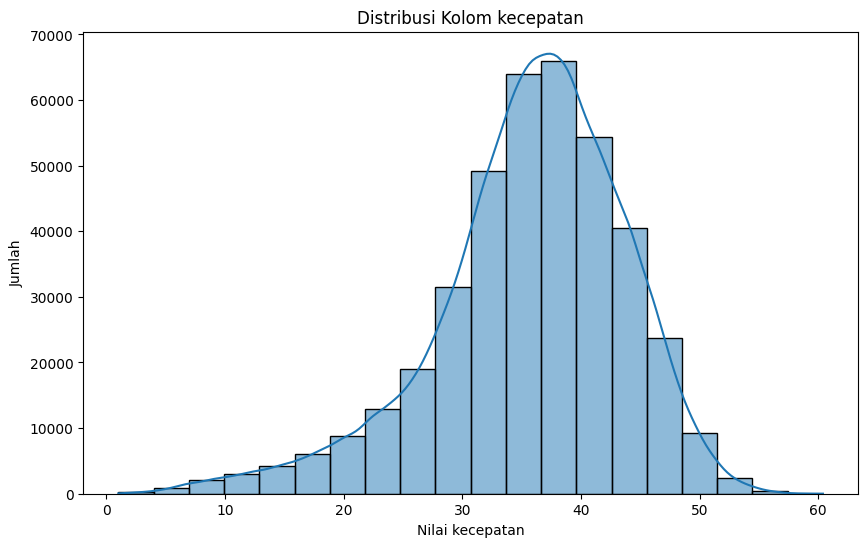

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['rerata_kecepatan'], bins=20, kde=True)
plt.title('Distribusi Kolom kecepatan')
plt.xlabel('Nilai kecepatan')
plt.ylabel('Jumlah')
plt.show()

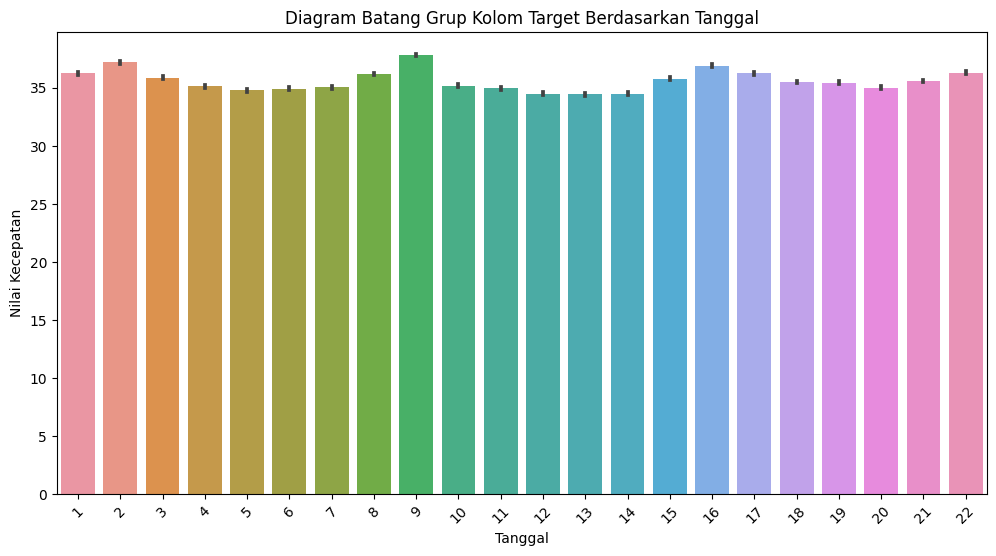

In [ ]:
# Contoh: Visualisasi diagram batang grup untuk kolom target berdasarkan tanggal
plt.figure(figsize=(12, 6))
sns.barplot(x='tanggal', y='rerata_kecepatan', data=train)
plt.title('Diagram Batang Grup Kolom Target Berdasarkan Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Kecepatan')
plt.xticks(rotation=45)
plt.show()

hari minggu kecepatannya lebih tinggi, hari libur besar kecepatannya rendah (macet mungkin)

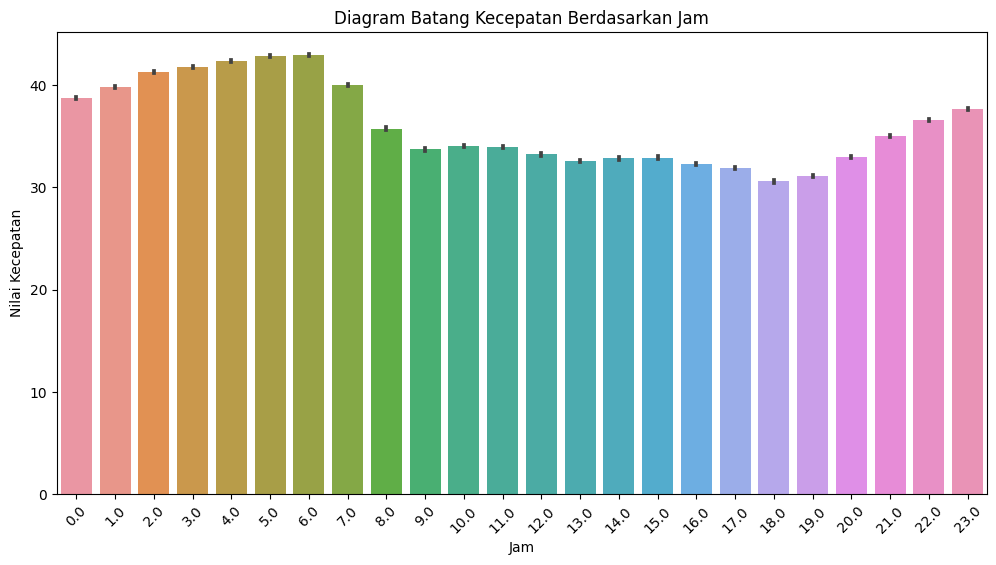

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='jam', y='rerata_kecepatan', data=train)
plt.title('Diagram Batang Kecepatan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Nilai Kecepatan')
plt.xticks(rotation=45)
plt.show()

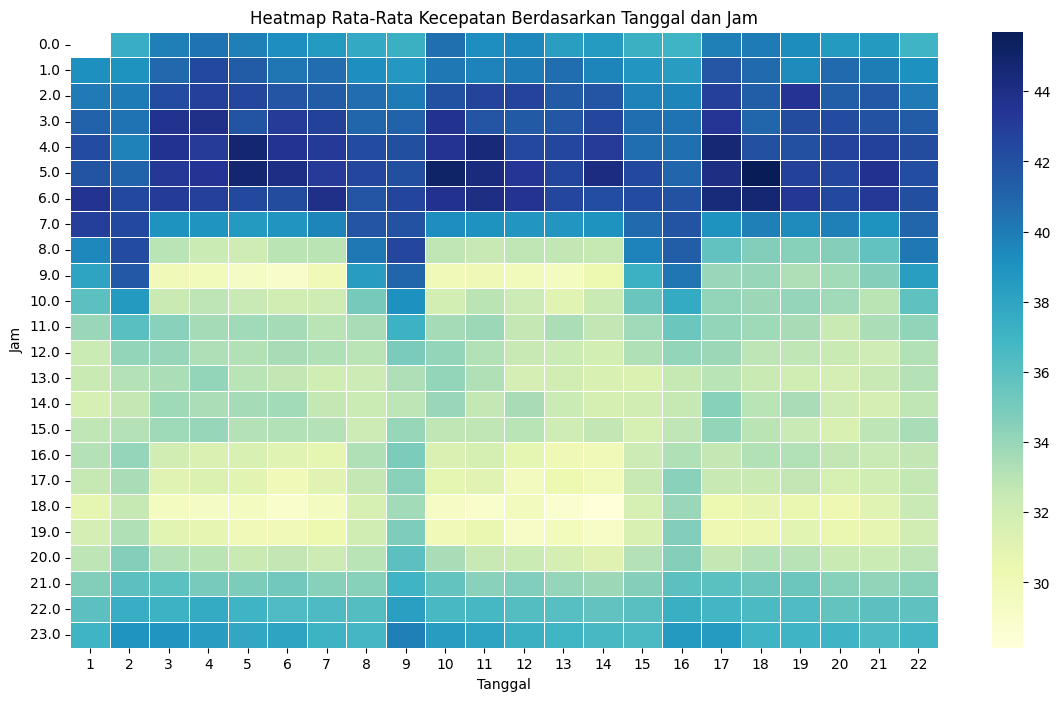

In [ ]:
# Pivot data untuk mendapatkan tabel pivot yang memuat rata-rata kecepatan berdasarkan tanggal dan jam
pivot_data = train.pivot_table(index='jam', columns='tanggal', values='rerata_kecepatan', aggfunc='mean')

# Membuat heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap Rata-Rata Kecepatan Berdasarkan Tanggal dan Jam')
plt.xlabel('Tanggal')
plt.ylabel('Jam')
plt.show()

hari libur besar tidak ngaruh, yang lebih berpengaruh weekend dan jam kerja

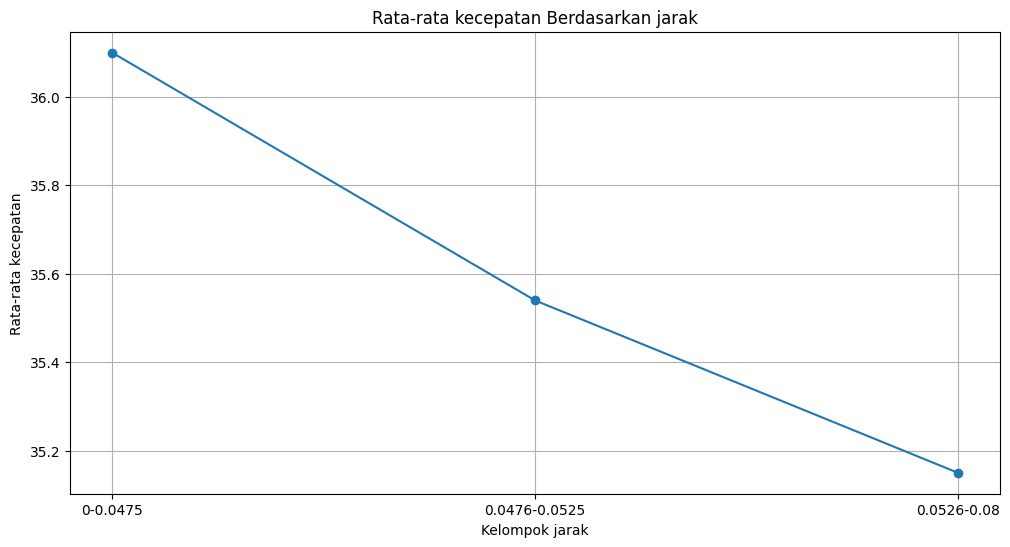

In [ ]:
data_new = train.copy()
# Tentukan batas-batas kelompok kecepatan
bins = [0, 0.0475, 0.0525, 0.08]
# Buat label untuk setiap kelompok
labels = ['0-0.0475', '0.0476-0.0525', '0.0526-0.08']
# Tambahkan kolom baru ke DataFrame dengan kelompok kecepatan
data_new['jarak_group'] = pd.cut(data_new['jarak_km'], bins=bins, labels=labels, right=False)

# Menghitung rata-rata jarak berdasarkan kelompok kecepatan
average_distance = data_new.groupby('jarak_group')['rerata_kecepatan'].mean().reset_index()

# Membuat plot garis
plt.figure(figsize=(12, 6))
plt.plot(average_distance['jarak_group'], average_distance['rerata_kecepatan'], marker='o')
plt.title('Rata-rata kecepatan Berdasarkan jarak')
plt.xlabel('Kelompok jarak')
plt.ylabel('Rata-rata kecepatan')
plt.grid(True)
plt.show()

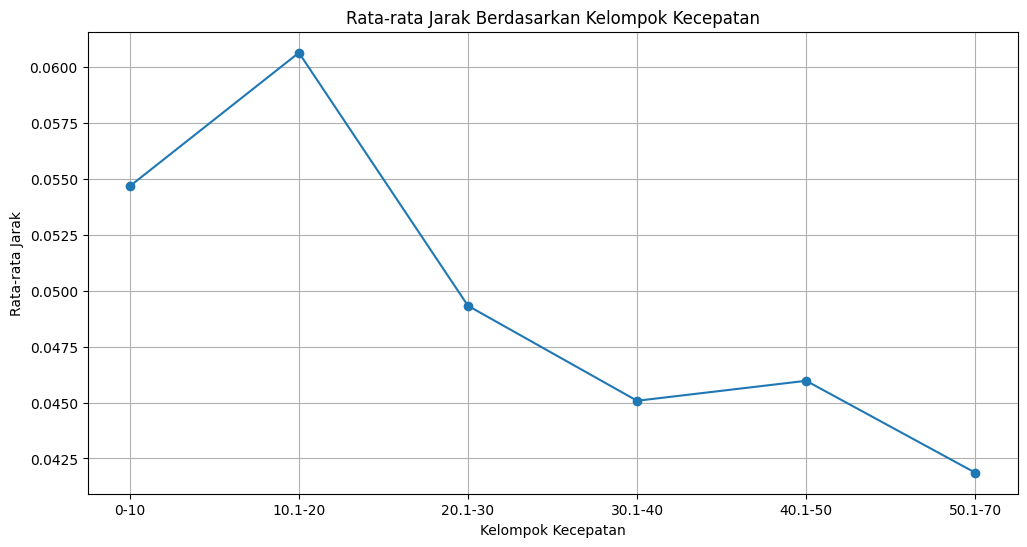

In [ ]:
# Tentukan batas-batas kelompok kecepatan
bins = [0, 10, 20, 30, 40, 50, 70]

# Buat label untuk setiap kelompok
labels = ['0-10', '10.1-20', '20.1-30', '30.1-40', '40.1-50', '50.1-70']

# Tambahkan kolom baru ke DataFrame dengan kelompok kecepatan
data_new['kecepatan_group'] = pd.cut(data_new['rerata_kecepatan'], bins=bins, labels=labels, right=False)

# Menghitung rata-rata jarak berdasarkan kelompok kecepatan
average_distance_by_speed_group = data_new.groupby('kecepatan_group')['jarak_km'].mean().reset_index()

# Membuat plot garis
plt.figure(figsize=(12, 6))
plt.plot(average_distance_by_speed_group['kecepatan_group'], average_distance_by_speed_group['jarak_km'], marker='o')
plt.title('Rata-rata Jarak Berdasarkan Kelompok Kecepatan')
plt.xlabel('Kelompok Kecepatan')
plt.ylabel('Rata-rata Jarak')
plt.grid(True)
plt.show()

jarak tidak terlalu berpengaruh terhadap kecepatan

#Feature Engeneering

##Data Weekend

In [ ]:
# Daftar tanggal weekend yang Anda berikan
tgl_weekend = [1, 2, 8, 9, 15, 16, 22, 23]

# Membuat rentang tanggal pada bulan tertentu (misalnya bulan Agustus 2023)
start_date = "2020-02-01"
end_date = "2020-02-29"
date_range = pd.date_range(start_date, end_date)

# Membuat DataFrame dengan kolom 'date' berdasarkan rentang tanggal
data_weekend = pd.DataFrame({'date': date_range})

# Menandai tanggal-tanggal weekend dengan 'ya' pada kolom 'weekend'
data_weekend['weekend'] = data_weekend['date'].dt.day.isin(tgl_weekend)
data_weekend['weekend'] = data_weekend['weekend'].map({True: 'ya', False: 'tidak'})

data_weekend['tanggal'] = data_weekend['date'].dt.day
data_weekend.drop(columns=['date'], inplace=True)

data_weekend

,weekend,tanggal
0,ya,1
1,ya,2
2,tidak,3
3,tidak,4
4,tidak,5
5,tidak,6
6,tidak,7
7,ya,8
8,ya,9
9,tidak,10


##Data Libur Nasional

In [ ]:
# Daftar tanggal weekend yang Anda berikan
tgl_libur = [10, 14,21,25,26]

# Membuat rentang tanggal pada bulan tertentu (misalnya bulan Agustus 2023)
start_date = "2020-02-01"
end_date = "2020-02-29"
date_range = pd.date_range(start_date, end_date)

# Membuat DataFrame dengan kolom 'date' berdasarkan rentang tanggal
data_libur = pd.DataFrame({'date': date_range})

# Menandai tanggal-tanggal weekend dengan 'ya' pada kolom 'weekend'
data_libur['libur'] = data_libur['date'].dt.day.isin(tgl_libur)
data_libur['libur'] = data_libur['libur'].map({True: 'ya', False: 'tidak'})

data_libur['tanggal'] = data_libur['date'].dt.day
data_libur.drop(columns=['date'], inplace=True)

data_libur

,libur,tanggal
0,tidak,1
1,tidak,2
2,tidak,3
3,tidak,4
4,tidak,5
5,tidak,6
6,tidak,7
7,tidak,8
8,tidak,9
9,ya,10


##Data Jam Aktivitas

In [ ]:
train.jam.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,  0.])

In [ ]:
# Membuat rentang jam dari 0 sampai 23
jam = list(range(24))

# Membuat kolom aktivitas berdasarkan jam yang diberikan
aktivitas = ['kegiatan' if 8 <= jam <= 18 else 'istirahat' for jam in jam]

# Membuat DataFrame dari data yang dihasilkan
data_aktivitas = pd.DataFrame({'jam': jam, 'aktivitas': aktivitas})

data_aktivitas

,jam,aktivitas
0,0,istirahat
1,1,istirahat
2,2,istirahat
3,3,istirahat
4,4,istirahat
5,5,istirahat
6,6,istirahat
7,7,istirahat
8,8,kegiatan
9,9,kegiatan


##Data From URL

In [ ]:
data_url = {
    'id': [691007296, 47010584, 22932408, 142479648, 8504977, 50841260, 4060819, 24704286, 4061596, 4004732, 3688059, 66924592, 3691841, 97453767, 4898588, 26785612, 182210371, 150783571, 40044423, 1210],
    'cycleway': ['lane', 'other', 'other', 'share_busway', 'other', 'other', 'lane', 'share_busway', 'other', 'lane', 'other', 'share_busway', 'other', 'share_busway', 'other', 'other', 'advisory', 'share_busway', 'other', 'other'],
    'highway': ['trunk', 'primary', 'secondary', 'primary', 'primary', 'primary', 'primary', 'primary', 'secondary', 'trunk', 'trunk', 'trunk', 'trunk', 'secondary', 'primary', 'primary', 'trunk', 'trunk', 'trunk', 'primary'],
    'lanes': [3, 0, 0, 3, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 3, 4, 0, 0],
    'lit': ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
    'sidewalk': ['separate', 'null', 'null', 'null', 'separate', 'both', 'both', 'separate', 'null', 'both', 'null', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'null'],
    'surface': ['asphalt', 'null', 'null', 'asphalt', 'asphalt', 'null', 'asphalt', 'asphalt', 'asphalt', 'null', 'null', 'asphalt', 'null', 'null', 'asphalt', 'asphalt', 'asphalt', 'asphalt', 'asphalt', 'null']
}

# Membuat DataFrame dari data
data_web = pd.DataFrame(data_url)

# Mengganti 'other' dengan kategorikal dan '0' dengan numerik
data_web.replace('null', 'other', inplace=True)   # Ganti "null" dengan "other"
data_web.drop(columns=['lit'], inplace=True)

data_web


,id,cycleway,highway,lanes,sidewalk,surface
0,691007296,lane,trunk,3,separate,asphalt
1,47010584,other,primary,0,other,other
2,22932408,other,secondary,0,other,other
3,142479648,share_busway,primary,3,other,asphalt
4,8504977,other,primary,2,separate,asphalt
5,50841260,other,primary,0,both,other
6,4060819,lane,primary,0,both,asphalt
7,24704286,share_busway,primary,2,separate,asphalt
8,4061596,other,secondary,0,other,asphalt
9,4004732,lane,trunk,2,both,other


##Gabung Data

In [ ]:
train_combined = pd.merge(train, data_weekend, left_on='tanggal', right_on='tanggal')
train_combined2 = pd.merge(train_combined, data_libur, left_on='tanggal', right_on='tanggal')
train_combined3 = pd.merge(train_combined2, data_aktivitas, left_on='jam', right_on='jam')
trainnew_combined = pd.merge(train_combined3, data_web, left_on='id_jalan', right_on='id')
trainnew_combined = trainnew_combined.drop(columns=['id'])

In [ ]:
trainnew_combined.shape

(398648, 24)

In [ ]:
trainnew_combined.isnull().sum()

waktu_setempat      0
id_jalan            0
id_titik_mulai      0
id_titik_akhir      0
rerata_kecepatan    0
kelompok            0
titik1              0
titik2              0
maxspeed_mph        0
lat1                0
long1               0
lat2                0
long2               0
jarak_km            0
tanggal             0
jam                 0
weekend             0
libur               0
aktivitas           0
cycleway            0
highway             0
lanes               0
sidewalk            0
surface             0
dtype: int64

In [ ]:
test_combined = pd.merge(test, data_weekend, left_on='tanggal', right_on='tanggal')
test_combined2 = pd.merge(test_combined, data_libur, left_on='tanggal', right_on='tanggal')
test_combined3 = pd.merge(test_combined2, data_aktivitas, left_on='jam', right_on='jam')
testnew_combined = pd.merge(test_combined3, data_web, left_on='id_jalan', right_on='id')
testnew_combined = testnew_combined.drop(columns=['id_y'])

In [ ]:
testnew_combined = testnew_combined.rename(columns={'id_x':'id'})
testnew_combined = testnew_combined.sort_values(by='id')

In [ ]:
testnew_combined.shape

(127489, 24)

In [ ]:
testnew_combined.head()

,id,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,kelompok,titik1,titik2,maxspeed_mph,lat1,...,tanggal,jam,weekend,libur,aktivitas,cycleway,highway,lanes,sidewalk,surface
0,0,2020-02-23 00:00:00+00:00,4004732,32046542,6454026544,32046542_6454026544,32046542,6454026544,30,51.465182,...,23,0.0,ya,tidak,istirahat,lane,trunk,2,both,other
6364,1,2020-02-23 00:00:00+00:00,182210371,1314925464,1314925496,1314925464_1314925496,1314925464,1314925496,30,51.458973,...,23,0.0,ya,tidak,istirahat,advisory,trunk,3,both,asphalt
12288,2,2020-02-23 00:00:00+00:00,22932408,1482086782,26481020,1482086782_26481020,1482086782,26481020,20,51.449437,...,23,0.0,ya,tidak,istirahat,other,secondary,0,other,other
6365,3,2020-02-23 00:00:00+00:00,182210371,3892883,267337489,267337489_3892883,267337489,3892883,30,51.457466,...,23,0.0,ya,tidak,istirahat,advisory,trunk,3,both,asphalt
18250,4,2020-02-23 00:00:00+00:00,66924592,266041030,2592978110,2592978110_266041030,2592978110,266041030,30,51.466309,...,23,0.0,ya,tidak,istirahat,share_busway,trunk,0,both,asphalt


In [ ]:
testnew_combined.to_csv("testnew_combined.csv", index=False)
trainnew_combined.to_csv("trainnew_combined.csv", index=False)